In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# 添加自定义路径
custom_path = os.path.abspath("../script")
if custom_path not in sys.path:
    sys.path.append(custom_path)

from loggoing_tools import *

In [4]:
data_list={
        "skid_water_quality":["QC1_Conductivity","QC2_Conductivity"],
        "Temperature":["QC1_Temperature","UT1_Temperature","QC2_Temperature"],                         				
}

In [5]:
columns_dict = read_csv_to_dict('../data/merged.csv')

for key, value in columns_dict.items():
    print(f"{key}: {value[:3]}") 

Date: ['03-10-2024' '03-10-2024' '03-10-2024']
Time: ['17:09:38' '17:09:39' '17:09:40']
Pump_A_Sel_Auto: [1. 1. 1.]
Pump_A_Sel_Man: [0. 0. 0.]
Pump_B_Sel_Auto: [0. 0. 0.]
Pump_B_Sel_Man: [0. 0. 0.]
Pump_A_In_OL: [0 0 0]
Pump_B_In_OL: [0 0 0]
Pump_A_Motor: [0 0 0]
Pump_B_Motor: [0 0 0]
MixTank_High: [0 0 0]
MixTank_Low: [0 0 0]
LeakDetector: [0 0 0]
RemovalTank_High: [0 0 0]
PT1_Pressure: [1. 1. 1.]
QC1_Conductivity: [1. 1. 1.]
QC2_Conductivity: [0. 0. 0.]
FT1_Flow: [0. 0. 0.]
PT2_Pressure: [1.94601 1.94678 1.94513]
UT1_Depth: [2.60895 2.60873 2.60895]
LT1_Level: [3.85798 3.85798 3.85798]
PT3_Level: [1.34616 1.34678 1.34678]
QC1_Temperature: [0.0883969 0.0876563 0.0879031]
PT5_Depth: [0.126696 0.125618 0.126696]
Salinity: [nan nan nan]
TDS: [nan nan nan]
UT1_Conductivity: [nan nan nan]
UT1_Temperature: [nan nan nan]
Fault_Register: [nan nan nan]
Fault_Register_2: [nan nan nan]
Down_Sampled_FT1: [nan nan nan]
QC2_Temperature: [nan nan nan]


In [6]:
seconds_from_start =np.array(calculate_seconds(columns_dict["Date"],columns_dict["Time"]))

In [7]:
seconds_from_start

array([    578,     579,     580, ..., 4726427, 4726428, 4726429])

In [8]:
bubble_removing_date = ["22-10-2024","24-10-2024"]
bubble_removing_time = ["20:00:00","04:00:00"]
bubble_removing_second= calculate_seconds(bubble_removing_date,bubble_removing_time)

pressure_test1_date =["07-11-2024","07-11-2024"]
pressure_test1_time =["08:00:00","13:00:00"]
pt1_second = calculate_seconds(pressure_test1_date,pressure_test1_time)

pressure_test2_date = ["20-11-2024","20-11-2024"]
pressure_test2_time = ["09:00:00","13:00:00"]
pt2_second = calculate_seconds(pressure_test2_date,pressure_test2_time)

In [9]:
bubble_removing_second

[1652400, 1767600]

In [10]:
mask1= (seconds_from_start>=bubble_removing_second[0]) * (seconds_from_start<=bubble_removing_second[1])
mask2= (seconds_from_start>=pt1_second[0]) * (seconds_from_start<=pt1_second[1]) 
mask3 = (seconds_from_start>=pt2_second[0]) * (seconds_from_start<=pt2_second[1])
water_not_adding = (mask1+mask2+mask3)==0
 

In [11]:
valid_time = seconds_from_start[water_not_adding]
FT1_flow=columns_dict["FT1_Flow"][water_not_adding]
QC1_con=columns_dict["QC1_Conductivity"][water_not_adding]
QC2_con=columns_dict["QC2_Conductivity"][water_not_adding]
QC1_temp=columns_dict["QC1_Temperature"][water_not_adding]
QC2_temp=columns_dict["QC2_Temperature"][water_not_adding]
UT1_temp=columns_dict["UT1_Temperature"][water_not_adding]

In [12]:
valid_time

array([    578,     579,     580, ..., 4726427, 4726428, 4726429])

In [39]:

def split_and_get_first_indices(arr,tun_thre=9.9,threshold=1.5):
   
    indices = []
    
    
    if len(arr) == 0:
        return indices
    exam_range=20
    
    last_index_distance=exam_range
    for i in range(exam_range, len(arr)-exam_range):
        last_index_distance=last_index_distance+1
        if last_index_distance<exam_range:
            continue
        if (arr[i:i+exam_range]<threshold).all() and  (arr[i-exam_range:i]>threshold).all():
            tail = arr[i:i+500000]<threshold
            
            end=np.argmax(tail==False)+500
            
            if arr[i-10:i+end].max()<tun_thre:
                print(arr[i-10:i+end].max())
                indices.append([i-10,i+end])
                last_index_distance=0

    for i,ind in enumerate(indices[0:-1]):
        if ind[1]>indices[i+1][0]:
            indices[i][1]=indices[i+1][0]-1    
        

    return indices

In [40]:
stop_index = split_and_get_first_indices(FT1_flow)


len(stop_index)

1.76537
5.14859
5.13551
4.90221
4.07543
8.18935
4.3897
4.3897
3.71252
5.24216
5.01479
3.90508
3.72462
3.69722
3.56785
3.56983
3.62315
3.61303
3.59822
3.56218
3.56218
3.44491
3.72487
3.72536
3.74807
3.72166
3.7461
3.7461
3.7461
3.72388
3.73918
3.72141
3.61476
3.63476
3.57674
3.61032
3.61106
3.58489
3.58489
3.61353
3.63402
3.60488
3.5881
3.59921
3.60266
3.59279
3.59279
3.63056
3.63056
3.6276
8.18935
3.54489
3.77572
3.79029
3.80609
8.18935
4.14579
3.97149
3.84386
8.18935
3.74857
2.53769
2.32278
2.32278
2.35947
2.33725
2.32977
2.35697
2.32452
8.19145
2.38742
2.38168
2.41288
2.41338
2.38717
8.19145
2.39341


77

In [41]:
stop_index

[[232777, np.int64(244806)],
 [293646, np.int64(295879)],
 [296046, np.int64(296844)],
 [298024, np.int64(299016)],
 [301538, np.int64(303206)],
 [352516, np.int64(357779)],
 [375518, 378505],
 [378506, np.int64(379124)],
 [385046, np.int64(385717)],
 [388332, 388550],
 [388551, np.int64(390219)],
 [390310, np.int64(391437)],
 [413500, np.int64(414698)],
 [424426, np.int64(425421)],
 [436519, 436736],
 [436737, 437182],
 [437183, 437597],
 [437598, np.int64(438256)],
 [439580, np.int64(440289)],
 [440654, 440919],
 [440920, 441211],
 [441212, np.int64(442137)],
 [444102, np.int64(444637)],
 [453767, 453938],
 [453939, np.int64(454595)],
 [454623, 455087],
 [455088, 455363],
 [455364, 455661],
 [455662, np.int64(456244)],
 [456296, 456456],
 [456457, np.int64(457174)],
 [457347, np.int64(458047)],
 [458253, np.int64(459010)],
 [459107, 459838],
 [459839, np.int64(460808)],
 [469629, np.int64(470239)],
 [470306, np.int64(471421)],
 [471462, 471656],
 [471657, np.int64(472277)],
 [472992,

In [32]:
phase_A =calculate_seconds(["26-10-2024","07-11-2024"],[ "03:30:00","07:00:00"])
phase_B =calculate_seconds(["08-11-2024","20-11-2024"],[ "03:30:00","08:59:00"])
before_HX=calculate_seconds(["21-10-2024"],["15:26:00"])
phase_A_index = [list(valid_time).index(phase_A[0]),list(valid_time).index(phase_A[1])]
phase_B_index = [list(valid_time).index(phase_B[0]),list(valid_time).index(phase_B[1])]
HX_index = list(valid_time).index(before_HX[0])

In [33]:
before_HX

[1549560]

In [34]:
print(phase_A_index)

[1068013, 2114474]


In [35]:
def find_increase_and_decrease_time(arr, initial_value):
    # Find the index of the maximum value in the array
    arr=list(arr)
    max_value = max(arr)
    max_index = arr.index(max_value)
    
    # Time to increase to the maximum value (index when max is first reached)
    time_to_max = max_index
    
    # Time from maximum value to first drop below 110% of the initial value
    threshold = (max_value-initial_value)/20+initial_value 
    drop_time = -1  # Default to -1 if no drop happens

    # Look for the first drop below the threshold after the max value
    #print(max_index)
    for i in range(max_index, len(arr)):
        if arr[i] < threshold:
            drop_time = i
            break
    #print(drop_time)
    # Return the results
    return time_to_max, drop_time-time_to_max

In [46]:
def plot_analysis(arr, SE_index, tau, constant_factor, phase_A_index, phase_B_index, HX_index, x_range=(0, 4000), y_range=(0,0.6)):
    """
    Plots multiple analysis figures based on the input data.

    Parameters:
    - arr: The array of data for conductivity over time.
    - SE_index: A list of tuples, each containing a start and end index for subarrays.
    - tau: The time constant used for envelope calculations.
    - constant_factor: The constant factor used for envelope calculations.
    - phase_A_index, phase_B_index, HX_index: Indices specifying different phases or conditions.
    - x_range: The x-axis range for the plots (default: (0, 4000)).
    - y_range: The y-axis range for the plots (default: (0, 2)).
    """

    # 第一张图：Conductivity Over Time
    plt.figure(figsize=(10, 6))
    for (i, j) in SE_index:
        # Select a subset of data to plot (20 indices before and 1000 indices after the current point)
        plot_data = arr[i:j]
        # Skip the plot if the minimum value of the plot data is negative
        if plot_data.min() < 0:
            continue
        # Set the default color to black ('k')
        color = 'k'
        
        # Change color based on different phases or conditions
        if i > phase_A_index[0] and i < phase_A_index[1]:
            color = 'r'  # Red for Phase A
        if i > phase_B_index[0] and i < phase_B_index[1]:
            color = 'b'  # Blue for Phase B
        if i < HX_index:
            color = 'g'  # Green before HX index
        
        # Plot the data with the selected color and some transparency (alpha = 0.3)
        plt.plot(plot_data, color=color, alpha=0.3)

    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.title("Conductivity Over Time", fontsize=14)  # Title of the plot
    plt.xlabel("Time (seconds after pump stops)", fontsize=12)  # X-axis label (representing time)
    plt.ylabel("Conductivity (uS/cm)", fontsize=12)  # Y-axis label (conductivity in microSiemens per cm)
    
    # Adding a legend for the different phases or conditions
    plt.plot([], color='r', label='Phase A')  # Add a dummy plot for Phase A (red)
    plt.plot([], color='b', label='Phase B')  # Add a dummy plot for Phase B (blue)
    plt.plot([], color='g', label='Before HX installation')  # Add a dummy plot for before HX (green)
    plt.plot([], color='k', label='Other')  # Add a dummy plot for the default black color (other conditions)
    plt.legend(loc='upper right')  # Display the legend at the top right
    plt.show()

    # 第二张图：Baseline Removed Conductivity Over Time
    plt.figure(figsize=(10, 6))
    for (i, j) in SE_index:
        # Ensure the array slicing is within bounds
        plot_data = arr[i:j]
        
        # Skip the plot if the minimum value of the plot data is negative
        if plot_data.min() < 0:
            continue
        
        # Set the default color to black ('k')
        color = 'k'
        
        # Change color based on different phases or conditions
        if phase_A_index[0] < i < phase_A_index[1]:
            color = 'purple'  # Purple for Phase A
        elif phase_B_index[0] < i < phase_B_index[1]:
            color = 'b'  # Blue for Phase B
        elif i < HX_index:
            color = 'g'  # Green for before HX index
        
        # Plot the data with the selected color and some transparency (alpha = 0.3)
        plt.plot(plot_data - plot_data[0], color=color, alpha=0.3)
    
    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.title("Conductivity  Over Time (Baseline Removed)", fontsize=14)  # Title of the plot
    plt.xlabel("Time (seconds after pump stops)", fontsize=12)  # X-axis label (representing time)
    plt.ylabel("Conductivity (uS/cm)", fontsize=12)  # Y-axis label (conductivity in microSiemens per cm)
    
    # Adding a legend for the different phases or conditions
    plt.plot([], color='purple', label='Phase A')  # Add a dummy plot for Phase A (purple)
    plt.plot([], color='b', label='Phase B')  # Add a dummy plot for Phase B (blue)
    plt.plot([], color='g', label='Before HX installation')  # Add a dummy plot for before HX (green)
    plt.plot([], color='k', label='Other')  # Add a dummy plot for the default black color (other conditions)

    # Envelope curve (assumed tau=600)
    time_points = np.arange(5000)  # Time range for the envelope plot

    # Envelope formula: only t-dependent part for the plot
    envelope = (1 - np.exp(-time_points / tau)) * constant_factor

    # The precomputed constant value for the plot (this excludes 't')
    precomputed_constant = constant_factor

    # Formula for the legend, where only 't' remains and the constant part is computed
    plt.plot(time_points, envelope, color="r", 
         label=r"Envelope: ${:.2f} \cdot (1 - \exp(-t/{:d}))$".format(constant_factor, tau))
    plt.legend(loc='upper right')  # Display the legend at the top right
    plt.show()

    # 第三张图：Peak Time vs Drop Time with Fitted Line
    peak_list = []
    drop_time_list = []
    
    for (i, j) in SE_index:
        # Select a subset of data to analyze (20 indices before and 6000 indices after the current stop index)
        check_data = arr[i:j]
        
        # Call the function to find the time to reach peak and the time to fall below 110% of the initial value
        t1, t2 = find_increase_and_decrease_time(check_data, check_data[0])
        
        if t2 < 0 or t1 < 0 or check_data[t1]>9.9:
            continue
        
        peak_list.append(check_data[t1])
        drop_time_list.append(t2)
        
        if check_data[t1]>5:
            print(i,j)

        # Determine color based on different phases or conditions
        color = 'k'  # Default to black ('k') for 'Other' condition
        
        # Change color based on different phases or conditions
        if phase_A_index[0] < i < phase_A_index[1]:
            color = 'purple'  # Purple for Phase A
        elif phase_B_index[0] < i < phase_B_index[1]:
            color = 'b'  # Blue for Phase B
        elif i < HX_index:
            color = 'g'  # Green for before HX index
        
        # Plot the data with the selected color
        plt.scatter(check_data[t1], t2, color=color, alpha=0.7)  # Plot peak_time vs. drop_time with transparency

    # Convert lists to numpy arrays for fitting
    peak_array = np.array(peak_list)
    drop_time_array = np.array(drop_time_list)
    fit_mask =  (drop_time_array < 250)*(peak_array<1)
    
    # Perform linear fit using numpy's polyfit function (1st degree polynomial for linear fitting)
    coeffs = np.polyfit(peak_array[fit_mask], drop_time_array[fit_mask], 1)
    
    # Generate the fitted line using the coefficients
    fitted_line = np.polyval(coeffs, peak_array)
    
    # Calculate the R-squared value for the fit
    residuals = drop_time_array - fitted_line
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((drop_time_array - np.mean(drop_time_array))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Plot the fitted line
    #plt.plot(peak_array, fitted_line, color='r', label=f"Fit: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}\nR² = {r_squared:.2f}")
    
    plt.title("Peak vs. Drop Time for Conductivity", fontsize=14)
    plt.xlabel("Peak (uS/cm)", fontsize=12)
    plt.ylabel("Drop Time (seconds)", fontsize=12)
    
    # Adding a legend for the different phases or conditions
    plt.plot([], color='purple', label='Phase A')
    plt.plot([], color='b', label='Phase B')
    plt.plot([], color='g', label='Before HX installation')
    plt.plot([], color='k', label='Other')
    plt.ylim(0,600)
    plt.xlim(0,3)
    plt.legend(loc='upper right')
   
    plt.show()




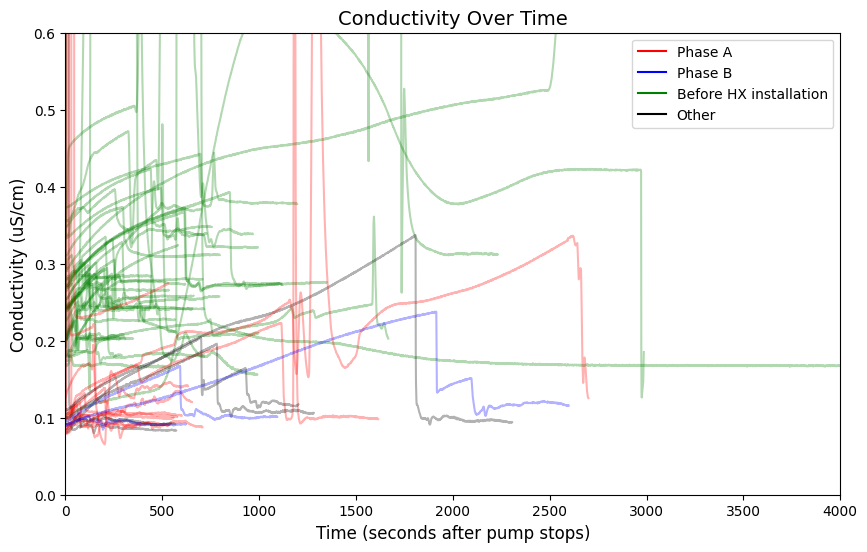

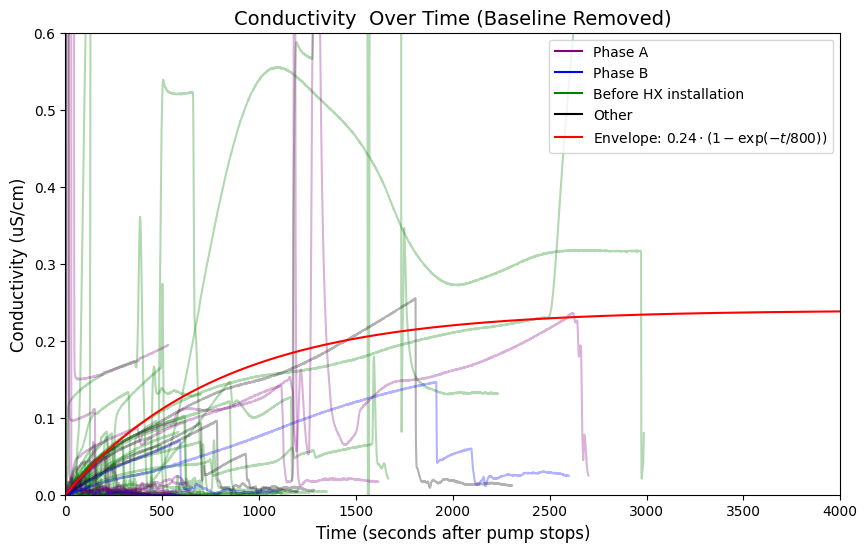

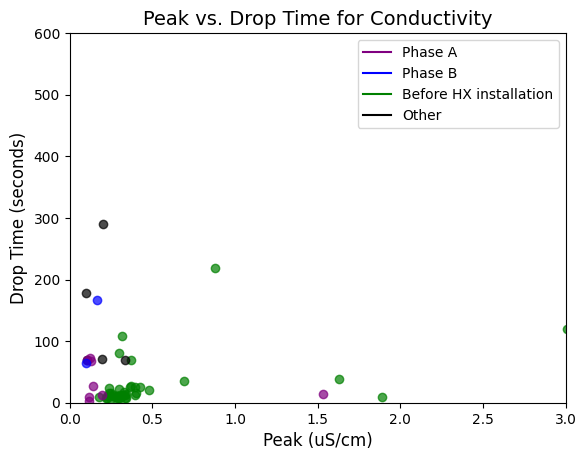

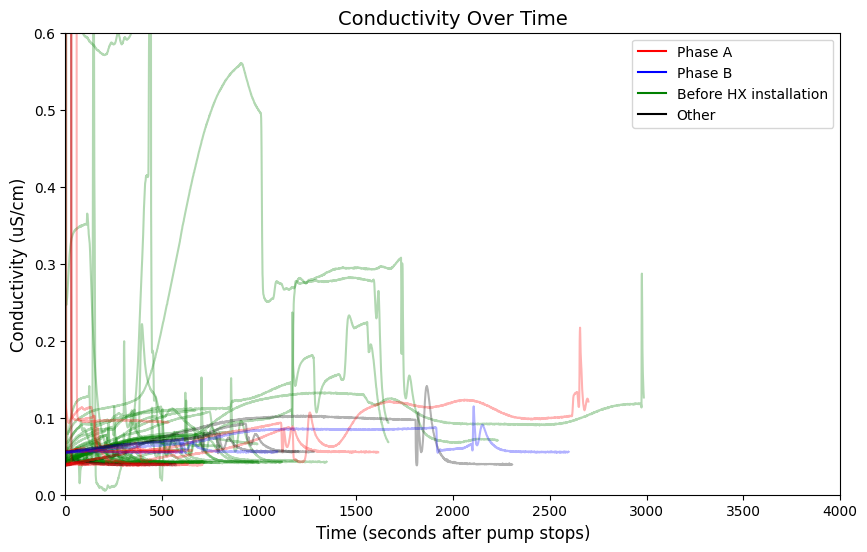

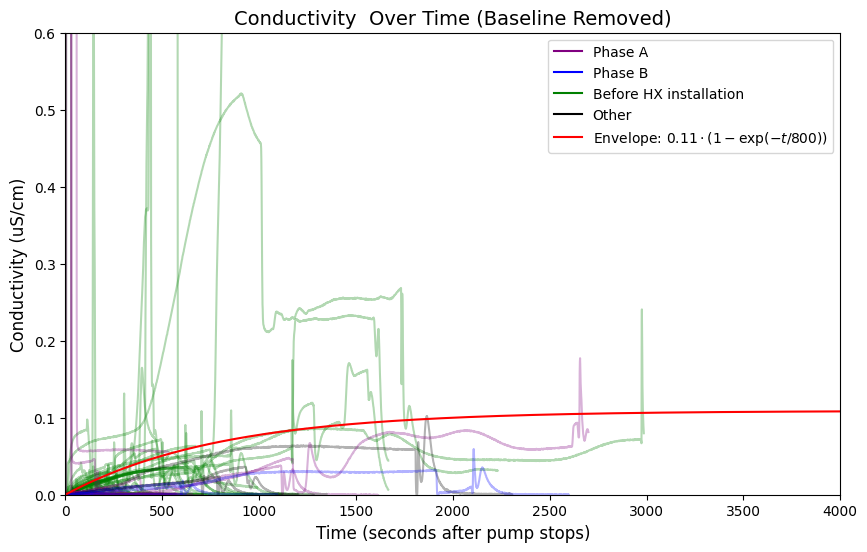

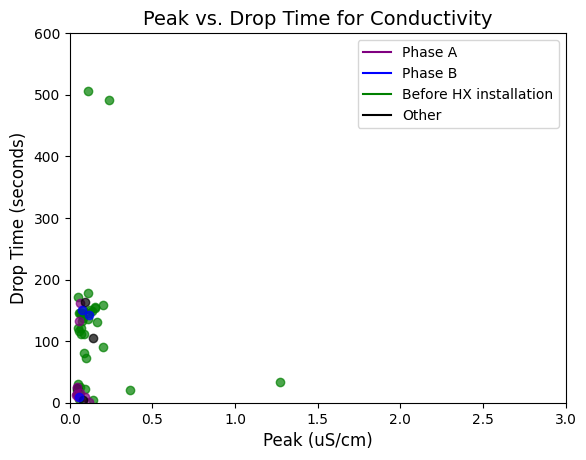

In [47]:
plot_analysis(QC1_con,stop_index,800,float(0.22 / (1 - np.exp(-2000 /800))), phase_A_index, phase_B_index, HX_index)
plot_analysis(QC2_con,stop_index,800,float(0.1 / (1 - np.exp(-2000 /800))), phase_A_index, phase_B_index, HX_index)

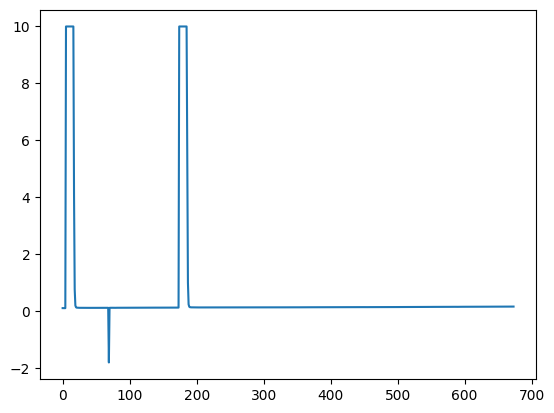

In [22]:
plt.plot(QC1_con[2847704:2848378])

In [23]:
def plot_waveform_with_peak_drop(QC1_con,QC2_con,stop_index,show_time_chara=[1,1],title="Ordinary QC purification waveform when circulation is paused(baseline removed)"):
    """
    Randomly selects a stop index, extracts waveform data, and plots it along with peak and drop times.

    Parameters:
    - QC1_con: The array of conductivity data.
    - stop_index: A list of tuples containing stop indices (start, end) for the data segments.
    - find_increase_and_decrease_time: A function that returns the peak time and drop time for a segment.

    Returns:
    - None. Displays a plot.
    """
    # Randomly select a stop index
    random_index = random.choice(stop_index)

    # Extract the waveform data based on the selected index
    check_data1 = QC1_con[random_index[0]:random_index[1]]

    # Get peak and drop times using the provided function
    peak_time1, drop_time1 = find_increase_and_decrease_time(check_data1, check_data1[0])

    # Create time series for the x-axis
    time_series = np.arange(len(check_data1))

    # Plot the waveform
    plt.plot(time_series, check_data1-check_data1[0], color='k', label="QC-1 waveform")

    if show_time_chara[0]==1:
        # Plot vertical lines for peak and drop times
        plt.axvline(x=peak_time1, color='r', linestyle='--', label="QC1 Peak Time")
        plt.axvline(x=drop_time1 + peak_time1, color='b', linestyle='--', label="QC1 Drop Time+Peak time")


    # Extract the waveform data based on the selected index
    check_data2 = QC2_con[random_index[0]:random_index[1]]

    # Get peak and drop times using the provided function
    peak_time2, drop_time2 = find_increase_and_decrease_time(check_data2, check_data2[0])

    # Create time series for the x-axis
    time_series = np.arange(len(check_data2))

    # Plot the waveform
    plt.plot(time_series, check_data2-check_data2[0], color='purple', label="QC-2 waveform")
    if show_time_chara[1]==1:
        # Plot vertical lines for peak and drop times
        plt.axvline(x=peak_time2, color='pink',  linestyle='--', label="QC2 Peak Time")
        plt.axvline(x=drop_time2 + peak_time2, color='green',  linestyle='--', label="QC2 Drop Time+Peak time")

    # Add title and labels
    plt.title(title, fontsize=14)
    plt.xlabel("Time (seconds)", fontsize=12)
    plt.ylabel("Conductivity (uS/cm)", fontsize=12)

    # Add legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


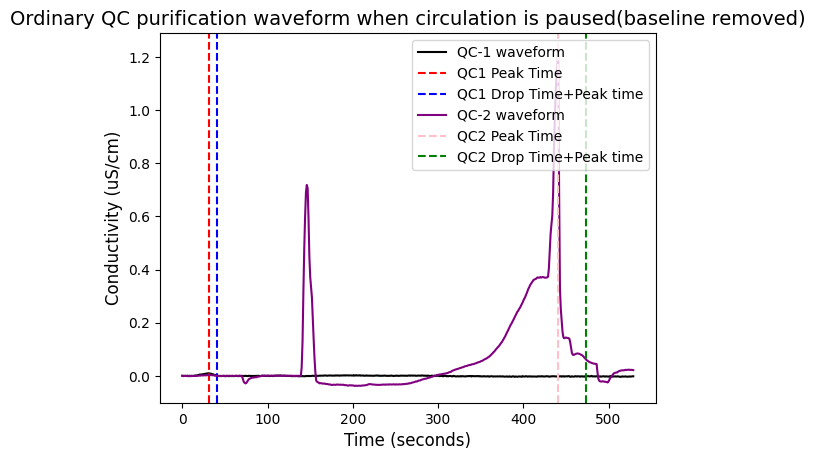

In [48]:
import random
plot_waveform_with_peak_drop(QC1_con,QC2_con, stop_index)

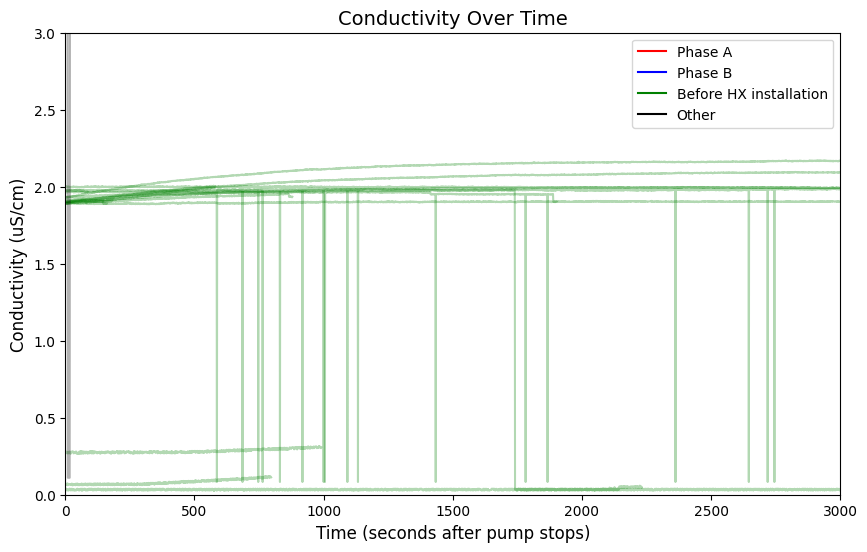

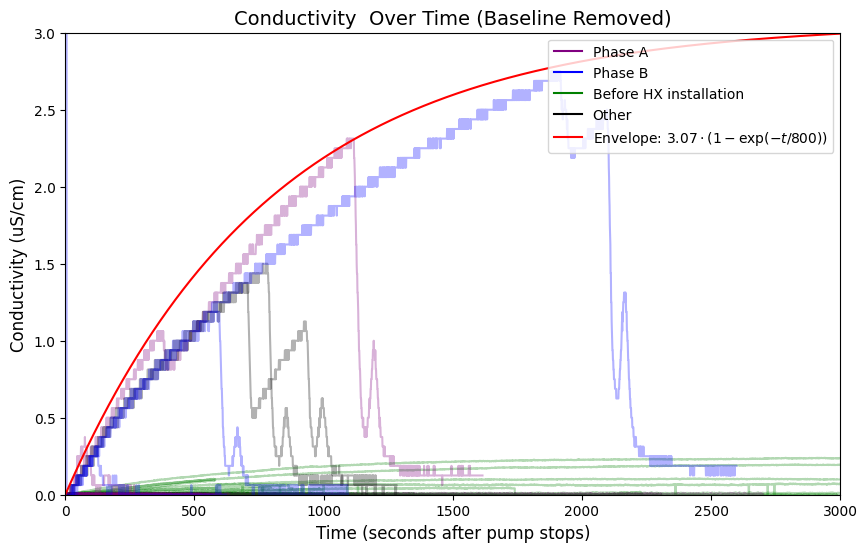

/tmp/ipykernel_12671/4246770330.py:139: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(peak_array[fit_mask], drop_time_array[fit_mask], 1)


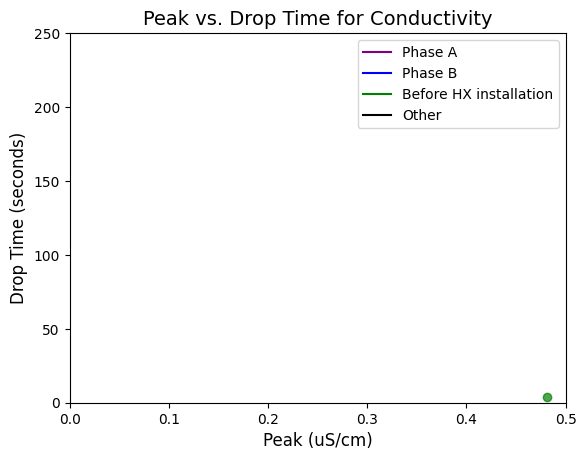

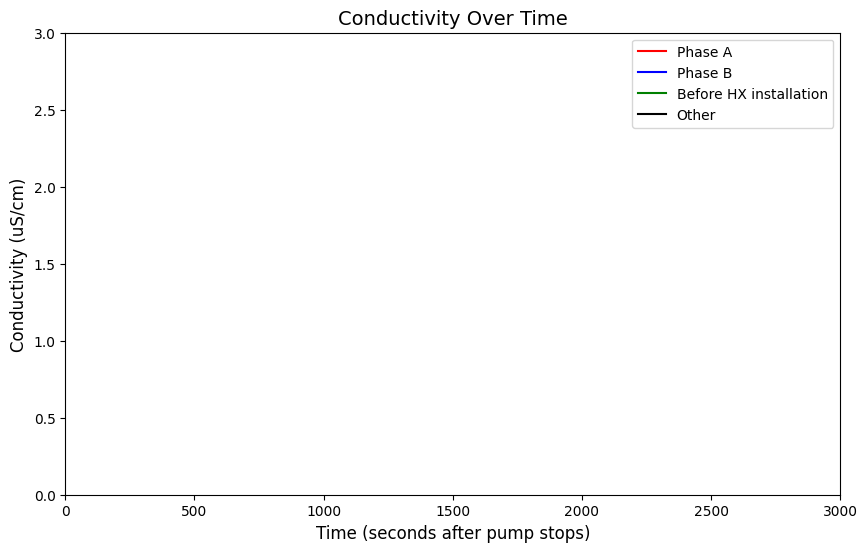

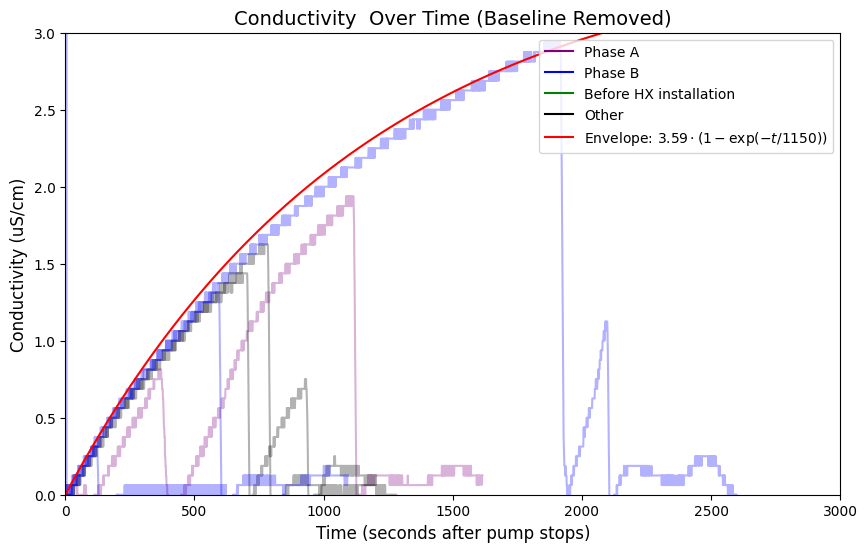

TypeError: expected non-empty vector for x

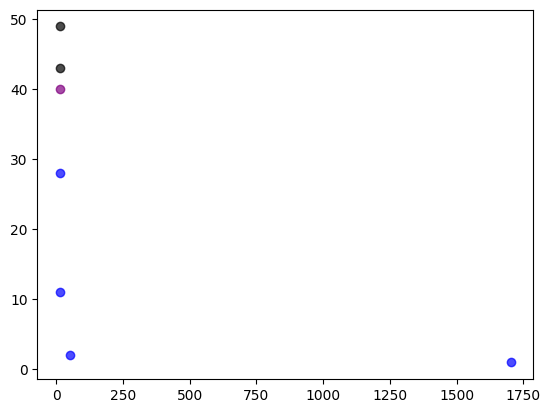

In [ ]:
plot_analysis(QC1_temp,stop_index,800,float(2.7 / (1 - np.exp(-1700 /800))), phase_A_index, phase_B_index, HX_index,x_range=(0,3000),y_range=(0,3))
plot_analysis(QC2_temp,stop_index,1150,float(2.9 / (1 - np.exp(-1900 /1150))), phase_A_index, phase_B_index, HX_index,x_range=(0,3000),y_range=(0,3))


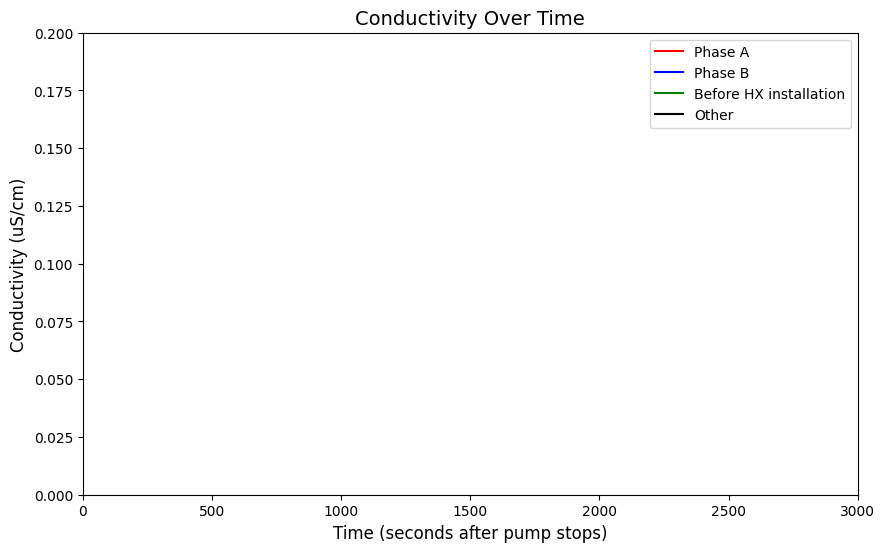

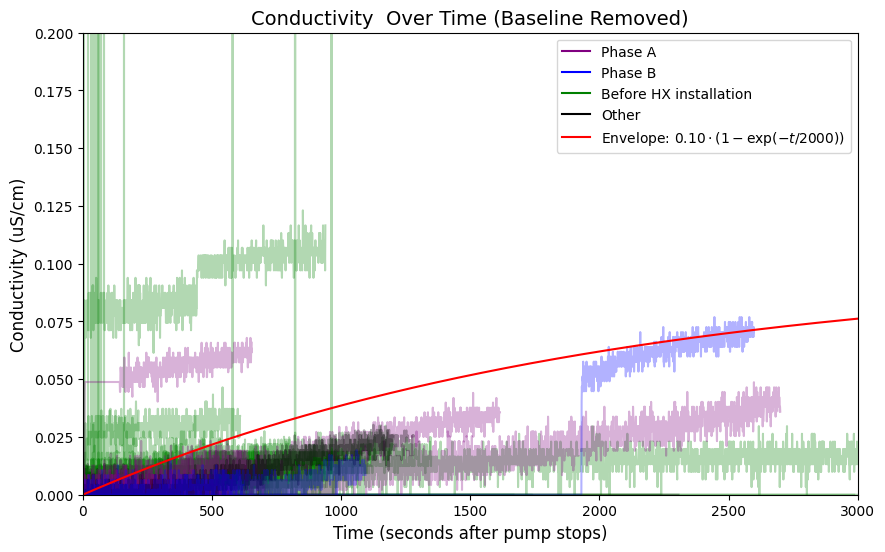

TypeError: expected non-empty vector for x

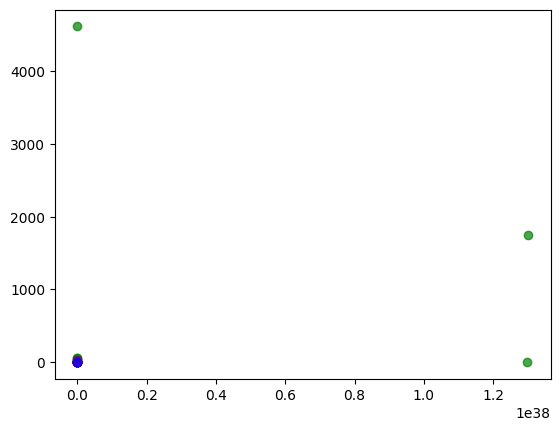

In [ ]:
plot_analysis(UT1_temp,stop_index,2000,float(0.07 / (1 - np.exp(-2500 /2000))), phase_A_index, phase_B_index, HX_index,x_range=(0,3000),y_range=(0,0.2))

In [50]:
def find_peak_and_high_flow_indices(QC1_con, FT1_flow, threshold_flow=1.5, peak_threshold=0.1):
    """
    This function detects peaks in the QC1_con array, with corresponding conditions from FT1_flow.
    
    Parameters:
    - QC1_con: Conductivity data to find peaks in.
    - FT1_flow: Flow data corresponding to the QC1_con array.
    - threshold_flow: Minimum flow rate for the peak to be valid.
    - peak_threshold: The threshold for detecting a peak (default 10% change).
    
    Returns:
    - indices: A list of tuples [start, end] indices of detected peaks.
    """
    indices = []  # List to store valid start-end indices of peaks
    len_limit = 10  # Length of consecutive increasing values to consider a peak
    min_peak_height = peak_threshold  # Threshold for the minimum peak height
    dis=100
    # Loop through the QC1_con array
    for i in range(len_limit, len(QC1_con) - len_limit):
        dis=dis+1
        if dis<100:
            continue
        # Check for consecutive increasing values for peak detection
        increasing_test = QC1_con[i:i+len_limit]  # Slice the data for the next 5 points
        if all(increasing_test[j] < increasing_test[j+1] for j in range(len_limit - 1)):  # Check for strictly increasing
            # Peak is detected, now find the end of the peak
            start = i - 1  # Peak start is at the last value before the increase

            # Now look for the point where the value falls back below 105% of the peak value
            for j in range(i+100, len(QC1_con)):
                if QC1_con[j] <= QC1_con[i] * 1.05:  # When the value falls to or below 105% of peak value
                    end = j  # Mark this as the end of the peak
                    break
            else:
                continue  # No valid end found, continue the loop

            # Check if the range of values (max - min) is significant enough to be considered a peak
            if (QC1_con[start:end].max() - QC1_con[start:end].min()) < min_peak_height * (QC1_con[start:end].max() + QC1_con[start:end].min()):
                continue  # The peak isn't high enough, skip this range

            # Check if the flow rate is above the threshold for the entire peak duration
            if (FT1_flow[start:end] < threshold_flow).any():
                continue  # Skip if any flow value is below the threshold

            # If all conditions are met, store the valid peak start and end indices
            indices.append([start, end])
            dis=0
    
    return indices


In [ ]:
spike_indices=find_peak_and_high_flow_indices(QC1_con, FT1_flow)

In [ ]:
len(spike_indices)

221

In [ ]:
spike_indices

[[295383, 295484],
 [303241, 303342],
 [378637, 383588],
 [390124, 390319],
 [442989, 443090],
 [457794, 457955],
 [460539, 460640],
 [536739, 536925],
 [538634, 538794],
 [538875, 538976],
 [596108, 601523],
 [597543, 597644],
 [597658, 597759],
 [597858, 598038],
 [598004, 598105],
 [598691, 599406],
 [599586, 599727],
 [599946, 600047],
 [601704, 602051],
 [602101, 602202],
 [602207, 602308],
 [602370, 602471],
 [602978, 603818],
 [603451, 603803],
 [603824, 603925],
 [702176, 702277],
 [708658, 708759],
 [709275, 709384],
 [709534, 709648],
 [709764, 709865],
 [710226, 710327],
 [710974, 711120],
 [711137, 711238],
 [712097, 712198],
 [712245, 712346],
 [712377, 712487],
 [712823, 712924],
 [713707, 713808],
 [714540, 714641],
 [715140, 715241],
 [716262, 716384],
 [718019, 718120],
 [772355, 772456],
 [781238, 781641],
 [781605, 781706],
 [789593, 789694],
 [789765, 789866],
 [873536, 873637],
 [873940, 874218],
 [874040, 874175],
 [875777, 875908],
 [876022, 876123],
 [876138, 88

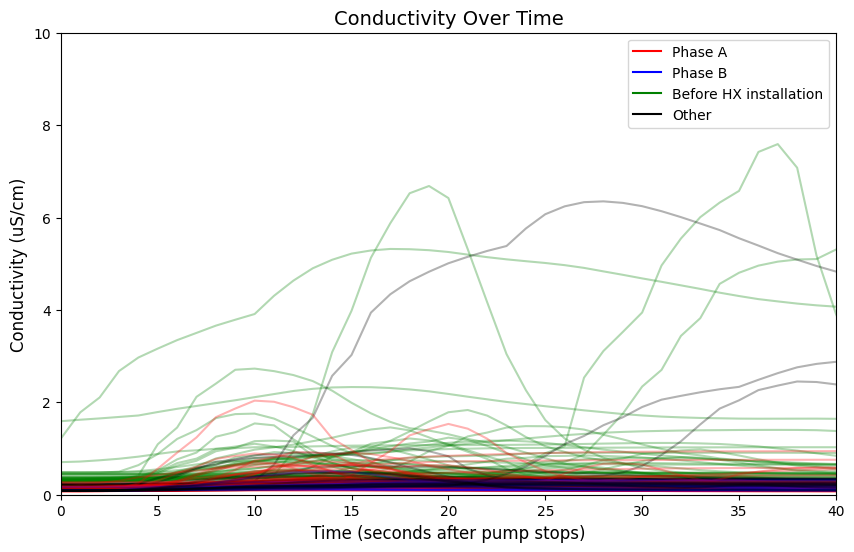

/tmp/ipykernel_12671/3789325179.py:94: RuntimeWarning: divide by zero encountered in divide
  envelope = (1 - np.exp(-time_points / tau)) * constant_factor
/tmp/ipykernel_12671/3789325179.py:94: RuntimeWarning: invalid value encountered in divide
  envelope = (1 - np.exp(-time_points / tau)) * constant_factor


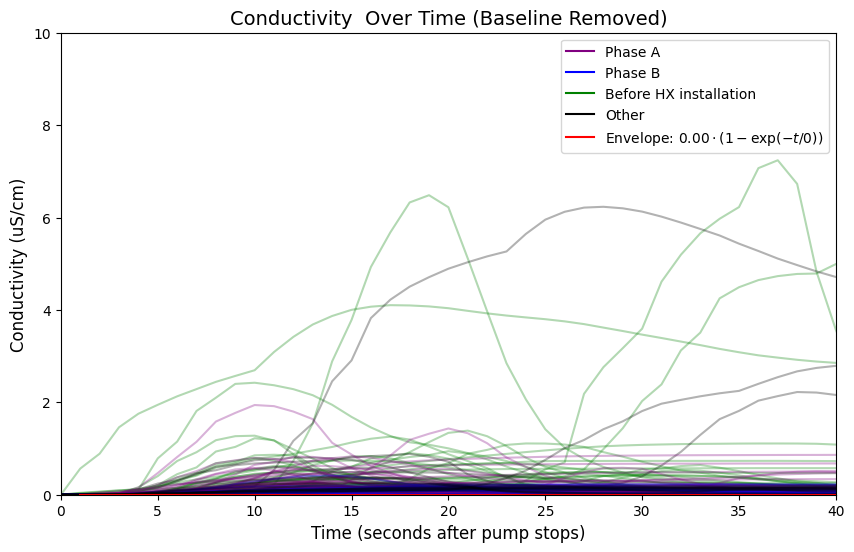

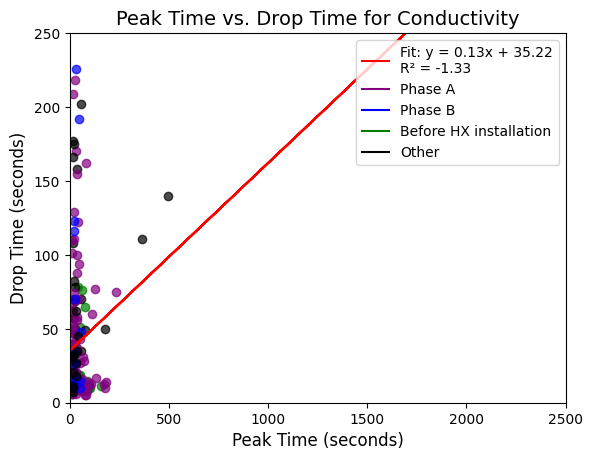

In [ ]:
plot_analysis(QC1_con,spike_indices,0,0,phase_A_index=phase_A_index,phase_B_index=phase_B_index,HX_index=HX_index,x_range=(0,40),y_range=(0,10))

In [ ]:
import numpy as np

def detect_local_maxima(QC1_con, threshold=0.12):
    """
    Detect local maxima in the QC1_con array.
    A local maximum is defined as a value greater than its neighbors.
    
    Parameters:
    - QC1_con: The array of conductivity values.
    - threshold: The minimum value that a peak must exceed to be considered valid (optional).
    
    Returns:
    - peaks: A list of indices where local maxima occur in QC1_con.
    """
    peaks = []  # List to store indices of local maxima
    
    # Loop through the array to check for local maxima (ignoring the first and last points)
    for i in range(1, len(QC1_con) - 1):
        if QC1_con[i] > QC1_con[i - 1] and QC1_con[i] > QC1_con[i + 1]:
            # Ensure that the peak is above the threshold
            if QC1_con[i] > threshold:
                peaks.append(i)
    
    return peaks


In [ ]:
len(detect_local_maxima(QC1_con))

168268

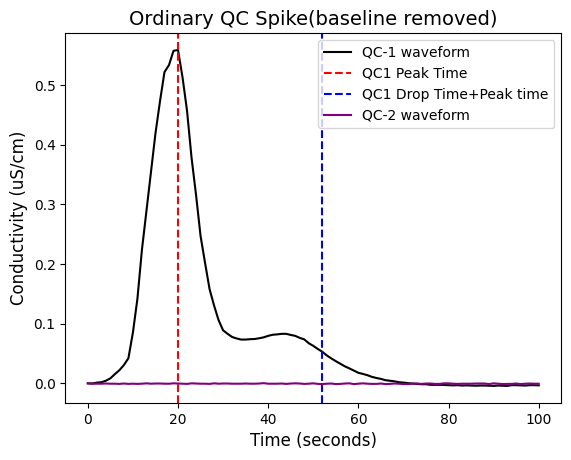

In [ ]:
plot_waveform_with_peak_drop(QC1_con,QC2_con, spike_indices,show_time_chara=[1,0],title="Ordinary QC Spike(baseline removed)")

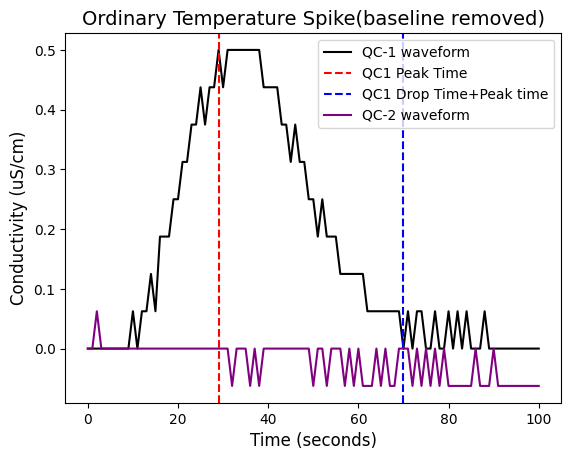

In [71]:

plot_waveform_with_peak_drop(QC1_temp,QC2_temp, spike_indices,show_time_chara=[1,0],title="Ordinary Temperature Spike(baseline removed)")

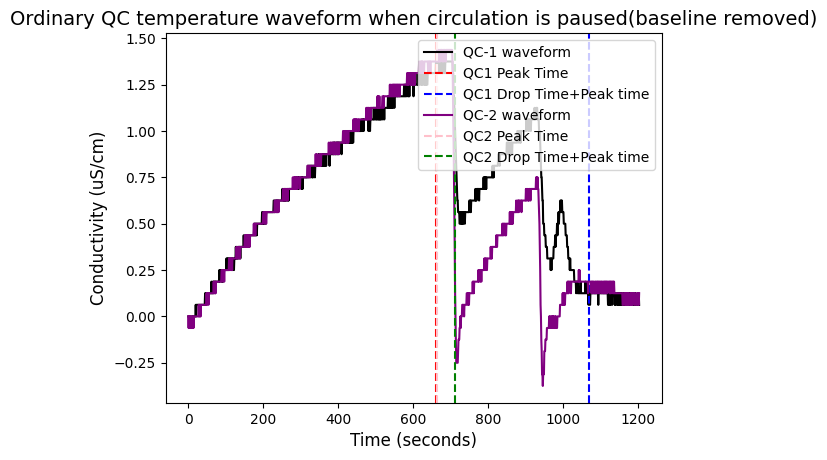

In [101]:
plot_waveform_with_peak_drop(QC1_temp,QC2_temp, stop_index,show_time_chara=[1,1],title="Ordinary QC temperature waveform when circulation is paused(baseline removed)")